In [ ]:
import numpy as np

def img2vector(filename):
    # 创建向量
    return_vec = np.zeros((1, 1024))
    # 打开数据文件，读取每行内容
    fr = open(filename)
    for i in range(32):
        # 读取每一行
        line_str = fr.readline()
        # 将每行前 32 字符转成 int 存入向量
        for j in range(32):
            return_vec[0, 32 * i + j] = int(line_str[j])
            
    return return_vec

In [ ]:
import operator

def classify0(inX, dataSet, labels, k):    
    """
    参数: 
    - inX: 用于分类的输入向量
    - dataSet: 输入的训练样本集
    - labels: 样本数据的类标签向量
    - k: 用于选择最近邻居的数目
    """
    
    # 获取样本数据数量
    dataSetSize = dataSet.shape[0]

    # 矩阵运算，计算测试数据与每个样本数据对应数据项的差值
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet

    # sqDistances 上一步骤结果平方和
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)

    # 取平方根，得到距离向量
    distances = sqDistances**0.5

    # 按照距离从低到高排序
    sortedDistIndices = distances.argsort()
    classCount = {}

    # 依次取出最近的样本数据
    for i in range(k):
        # 记录该样本数据所属的类别
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    # 对类别出现的频次进行排序，从高到低
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)

    # 返回出现频次最高的类别
    return sortedClassCount[0][0]

In [11]:
from os import listdir

def handwritingClassTest(k):
    # 样本数据的类标签列表
    hwLabels = []

    # 样本数据文件列表
    trainingFileList = listdir('digits/trainingDigits')
    m = len(trainingFileList)

    # 初始化样本数据矩阵（M*1024）
    trainingMat = np.zeros((m, 1024))

    # 依次读取所有样本数据到数据矩阵
    for i in range(m):
        # 提取文件名中的数字
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)

        # 将样本数据存入矩阵
        trainingMat[i, :] = img2vector(
            'digits/trainingDigits/%s' % fileNameStr)

    # 循环读取测试数据
    testFileList = listdir('digits/testDigits')

    # 初始化错误率
    errorCount = 0.0
    mTest = len(testFileList)

    # 循环测试每个测试数据文件
    for i in range(mTest):
        # 提取文件名中的数字
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])

        # 提取数据向量
        vectorUnderTest = img2vector('digits/testDigits/%s' % fileNameStr)

        # 对数据文件进行分类
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, k)

        # 打印 K 近邻算法分类结果和真实的分类
        # print("测试样本 %d, 分类器预测: %d, 真实类别: %d" %
        #       (i+1, classifierResult, classNumStr))

        # 判断K 近邻算法结果是否准确
        if (classifierResult != classNumStr):
            errorCount += 1.0

    # 打印错误率
    return errorCount

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240:

The best k is 27
The best accuracy is 36.0


/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/orangex4/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWar

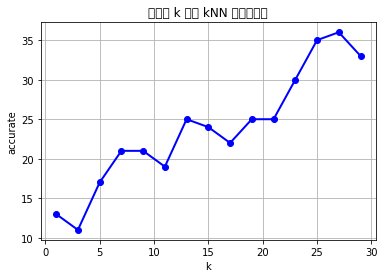

In [12]:
import matplotlib.pyplot as plt

k_values = range(1, 30, 2)
k_accuracy = [handwritingClassTest(k) for k in k_values]


The best k is 3
The best loss is 11.0


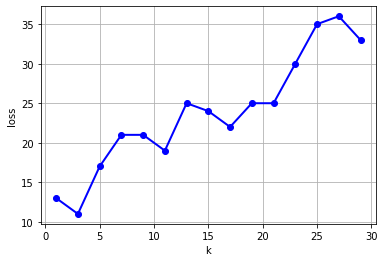

In [22]:
# 输出最优的 k 值
print('The best k is', k_values[k_accuracy.index(min(k_accuracy))])
print('The best loss is', min(k_accuracy))

# 生成折线图, 用于分析
# plt.rcParams['font.sans-serif'] = []  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 'b': 颜色蓝色, 'o': 点形圆形, '-': 线形实线, 线条宽度为 2
plt.plot(k_values, k_accuracy, 'bo-', linewidth=2)
plt.xlabel('k')  # 横坐标轴的标题
plt.ylabel('loss')  # 纵坐标轴的标题
plt.grid()  # 显示网格
# plt.title('不同的 k 值的 kNN 分类准确率') # 图形的标题

# 显示图形
plt.show()